In [11]:
import xarray as xr


run = 1507

In [18]:
tf = xr.open_dataset(
    f"aug/32408/{run}/tf.h5",
    engine="h5netcdf",
    group="tf",
    phony_dims="access",
)
tf

<xarray.Dataset> Size: 2kB
Dimensions:                                           (phony_dim_0: 111)
Dimensions without coordinates: phony_dim_0
Data variables:
    b_field_tor_vacuum_r&data                         (phony_dim_0) float64 888B ...
    ids_properties&comment                            <U22 88B ...
    ids_properties&creation_date                      <U10 40B ...
    ids_properties&homogeneous_time                   int32 4B ...
    ids_properties&provider                           <U5 20B ...
    ids_properties&version_put&access_layer           <U7 28B ...
    ids_properties&version_put&access_layer_language  <U6 24B ...
    ids_properties&version_put&data_dictionary        <U6 24B ...
    r0                                                float64 8B ...
    time                                              (phony_dim_0) float64 888B ...

In [19]:
tf = (
    tf.swap_dims(
        {
            tf["time"].dims[0]: "time"
        }
    ).rename_vars(
        {
            "b_field_tor_vacuum_r&data": "b_field_tor_vacuum_r",
        }
    ).assign_attrs(
        {
            "comment": tf["ids_properties&comment"].data,
            "creation_date": tf["ids_properties&creation_date"].data,
            "provider": tf["ids_properties&provider"].data,
            
        }
    ).drop_vars(
        [
            "ids_properties&comment",
            "ids_properties&provider",
            "ids_properties&creation_date",
            "ids_properties&homogeneous_time",
            "ids_properties&version_put&access_layer",
            "ids_properties&version_put&access_layer_language",
            "ids_properties&version_put&data_dictionary",
        ]
    )
)
tf

<xarray.Dataset> Size: 2kB
Dimensions:               (time: 111)
Coordinates:
  * time                  (time) float64 888B 2.0 2.05 2.1 2.15 ... 7.4 7.45 7.5
Data variables:
    b_field_tor_vacuum_r  (time) float64 888B ...
    r0                    float64 8B ...
Attributes:
    comment:        Based on jpol from EQI
    creation_date:  2024-07-15
    provider:       mberg

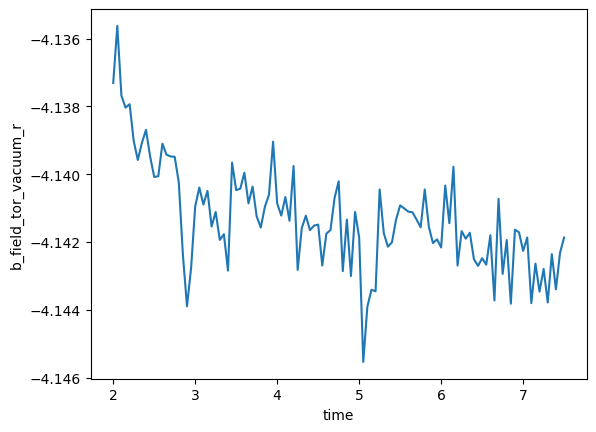

In [20]:
tf["b_field_tor_vacuum_r"].plot()